# Team SY_1 CPT Unsupervised

## EDSA Movie Recommendation System

###  Project Description

>In today’s technology driven world, recommender systems are socially and economically critical for ensuring that individuals can make appropriate choices surrounding the content they engage with on a daily basis. One application where this is especially true surrounds movie content recommendations; where intelligent algorithms can help viewers find great titles from tens of thousands of options.
>
>With this context, EDSA is challenging you to construct a recommendation algorithm based on content or collaborative filtering, capable of accurately predicting how a user will rate a movie they have not yet viewed based on their historical preferences.
>
>Providing an accurate and robust solution to this challenge has immense economic potential, with users of the system being exposed to content they would like to view or purchase - generating revenue and platform affinity.

https://www.kaggle.com/c/edsa-recommender-system-predict/overview

### Problem Statement

>Build a recommendation engine that will recommend movies to users that they want to view and purchase, with the goal of increasing both revenues and brand affinity among users of the system.

### Assumptions

>Analysis was conducted with the assumption that the data belongs to an existing company with a movie streaming service, that now requires the building of a recommendation engine, and the integration thereof into the their movie streaming service.

![alt text](https://images.unsplash.com/photo-1485846234645-a62644f84728?ixlib=rb-1.2.1&ixid=eyJhcHBfaWQiOjEyMDd9&auto=format&fit=crop&w=1040&q=80)
<span>Photo by <a href="https://unsplash.com/@jakobowens1">Jakob Owens</a> on <a href="https://unsplash.com/s/photos/movie-rentals?utm_source=unsplash&amp;utm_medium=referral&amp;utm_content=creditCopyText">Unsplash</a></span>

### Notebook Overview

# Table of contents <a name="top"></a>

1. [Importing packages](#packages) <br><br>

2. [Loading and viewing data](#data) <br><br>

3. [Data description](#description) <br><br>

4. [Utility Functions](#utility)<br><br>

5. [Data Preprocessing](#preprocessing) <br><br>

6. [Exploratory data analysis](#eda)<br><br>

7. [Modelling](#modelling) <br><br>

8. [Model evaluation](#evaluation) <br><br>

9. [Conclusion](#conclusion) <br><br>

# 1. Importing packages <a name="packages"></a>
[Return to top](#top) <br><br>

The following packages need to be installed on your local machine.

- numpy
- pandas
- seaborn
- matplotlib
- surprise
- scikit-learn

The folowing standard python libraries will be required

- pickle
- datetime

In [27]:
%%capture
!pip install ipython-autotime

%load_ext autotime

time: 34.4 s


In [43]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

time: 384 ms


In [29]:
#===== Data chrunching and plotting packages =============
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

#===== Scikit Surprise ================
from surprise import SVD 
from surprise import SVDpp
from surprise import Reader
from surprise import Dataset
from surprise import accuracy
from surprise import NormalPredictor
from surprise.model_selection import cross_validate
from surprise.model_selection import train_test_split

#===== Scikit-learn ================
from sklearn.utils import shuffle

#===== Standard python packages ================
import pickle
from datetime import datetime

time: 7.61 s


# 2. Loading  and viewing data <a name="data"></a>
[Return to top](#top) <br><br>

- Data loads from Github repository
- 
- 
- 
- 
- 
- 
- 
- 

In [30]:
# Importing the data
train = pd.read_csv('edsa-recommender-system-predict/train.csv')
test = pd.read_csv('edsa-recommender-system-predict/test.csv')
tags = pd.read_csv('edsa-recommender-system-predict/tags.csv')
movies = pd.read_csv('edsa-recommender-system-predict/movies.csv')
links = pd.read_csv('edsa-recommender-system-predict/links.csv')
imdb_data = pd.read_csv('edsa-recommender-system-predict/imdb_data.csv')
genome_tags = pd.read_csv('edsa-recommender-system-predict/genome_tags.csv')
genome_scores = pd.read_csv('edsa-recommender-system-predict/genome_scores.csv')

time: 35.4 s


First up we view the first 5 rows of each dataset

In [16]:
train.head()

,userId,movieId,rating,timestamp
0,5163,57669,4.0,1518349992
1,106343,5,4.5,1206238739
2,146790,5459,5.0,1076215539
3,106362,32296,2.0,1423042565
4,9041,366,3.0,833375837


time: 3.83 s


In [17]:
test.head()

,userId,movieId
0,1,2011
1,1,4144
2,1,5767
3,1,6711
4,1,7318


time: 411 ms


In [18]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


time: 221 ms


In [19]:
imdb_data.head()

,movieId,title_cast,director,runtime,budget,plot_keywords
0,1,Tom Hanks|Tim Allen|Don Rickles|Jim Varney|Wal...,John Lasseter,81.0,"$30,000,000",toy|rivalry|cowboy|cgi animation
1,2,Robin Williams|Jonathan Hyde|Kirsten Dunst|Bra...,Jonathan Hensleigh,104.0,"$65,000,000",board game|adventurer|fight|game
2,3,Walter Matthau|Jack Lemmon|Sophia Loren|Ann-Ma...,Mark Steven Johnson,101.0,"$25,000,000",boat|lake|neighbor|rivalry
3,4,Whitney Houston|Angela Bassett|Loretta Devine|...,Terry McMillan,124.0,"$16,000,000",black american|husband wife relationship|betra...
4,5,Steve Martin|Diane Keaton|Martin Short|Kimberl...,Albert Hackett,106.0,"$30,000,000",fatherhood|doberman|dog|mansion


time: 370 ms


In [20]:
links.head()

,movieId,imdbId,tmdbId
0,1,114709,862.0
1,2,113497,8844.0
2,3,113228,15602.0
3,4,114885,31357.0
4,5,113041,11862.0


time: 11.5 ms


In [23]:
tags.head()

,userId,movieId,tag,timestamp
0,3,260,classic,1439472355
1,3,260,sci-fi,1439472256
2,4,1732,dark comedy,1573943598
3,4,1732,great dialogue,1573943604
4,4,7569,so bad it's good,1573943455


time: 11.9 ms


In [24]:
genome_tags.head()

,tagId,tag
0,1,007
1,2,007 (series)
2,3,18th century
3,4,1920s
4,5,1930s


time: 7.98 ms


In [25]:
genome_scores.head()

,movieId,tagId,relevance
0,1,1,0.02875
1,1,2,0.02375
2,1,3,0.06250
3,1,4,0.07575
4,1,5,0.14075


time: 9.97 ms


# 3. Data description <a name="description"></a>
[Return to top](#top) <br><br>

# 4. Utility functions and variables <a name="utility"></a>
[Return to top](#top) <br><br>

These will be used during data preprocessing and exploratory data analysis:

In [31]:
decades = [(1870, 1879), (1880, 1889), (1990, 1909), (1910, 1919), (1920, 1929),
           (1930, 1939), (1940, 1949), (1950, 1959), (1960, 1969), (1970, 1979),
           (1980, 1989), (1990, 1999), (2000, 2009), (2010, 2019), (9999, 10000)]

decade_categories = ['1870s', '1880s', '1890s', '1900s', '1910s', '1920s', '1930s', '1940',
           '1950s', '1960s', '1970s', '1980s', '1990s', '2000s', '2010s', 'Unspecified']

time: 21.2 ms


In [32]:
def get_release_dates(title):
    
    sub = title[-5:-1]
    year = int(sub) if sub.isdigit() else 9999    
    return year

def get_releases_by_year(df, release_years):
    
    mask = df[(df['release_year'] >= release_years[0]) & (df['release_year'] <= release_years[-1])]
    return [mask[mask['release_year'] == year]['movieId'].nunique() for year in release_years]

def count_ratings_by_years(df, start, end):
    
    ratings_count = [0] * 10
    ratings = np.linspace(0.5, 5.0, 10)
    for year in range(start, end + 1):
        df_year = df[df['rating_year'] == year]
        count = 0
        for rating in ratings:
            ratings_count[count] += (df_year[df_year['rating'] == rating]['movieId'].count())
            count += 1
    return ratings_count

def get_genre_count(number_of_genres, movie_genres, df):
    
    genre_count = [0] * len(movie_genres)
    for index, genres in df[df['genre_count'] == number_of_genres]['genres'].items():
        for genre in genres.split('|'):
            genre_count[movie_genres.index(genre)] += 1
            
    return genre_count

def movie_rating_decade_released(start_year, end_year, decades, df):
    
    ratings_count = []
    ratings_average = []
    
    for start, end in decades:
        mask_1 = (df['release_year'] >= start) & (df['release_year'] <= end)
        mask_2 = (df['rating_year'] >= start_year) & (df['rating_year'] <= end_year)
        sub_df = df[mask_1 & mask_2]['rating']
        ratings_count.append(sub_df.count())
        ratings_average.append(np.round(sub_df.mean(), 2))
    
    return ratings_count, ratings_average

def get_user_ids(year, user_ids, df):
    
    users = []
    for user_id in user_ids:
        if df[df['userId'] == user_id]['rating_year'].max() <= year:
            users.append(user_id)
    
    return users

time: 1.57 s


# 5. Data preprocessing <a name="preprocessing"></a>
[Return to top](#top) <br><br>


The following steps are taken to prepare the data for analysis and subsequent modelling stage:

# 6. Exploratory data analysis <a name="eda"></a>
[Return to top](#top) <br><br>

In [33]:
# Merging the train and movies data on the movieId column
train = train.merge(movies, on='movieId')

time: 13 s


In [34]:
# Convert timestamp to year column representing the year the rating was made on merged dataframe
train['rating_year'] = train['timestamp'].apply(lambda timestamp: datetime.fromtimestamp(timestamp).year)
train.drop('timestamp', axis=1, inplace=True)

time: 19.2 s


In [35]:
# train dataframe after merge with movies dataframe, the creation of year and dropping of the timestamp columns respectively
train.head()

,userId,movieId,rating,title,genres,rating_year
0,5163,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2018
1,87388,57669,3.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2009
2,137050,57669,4.0,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015
3,120490,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2014
4,50616,57669,4.5,In Bruges (2008),Comedy|Crime|Drama|Thriller,2015


time: 1.51 s


In [38]:
# Checking the number of uniques years in the rating_year column
train['rating_year'].nunique()

25

time: 102 ms


In [37]:
# Checking the earliest and most recent ratings years 
train['rating_year'].min(), train['rating_year'].max()

(1995, 2019)

time: 493 ms


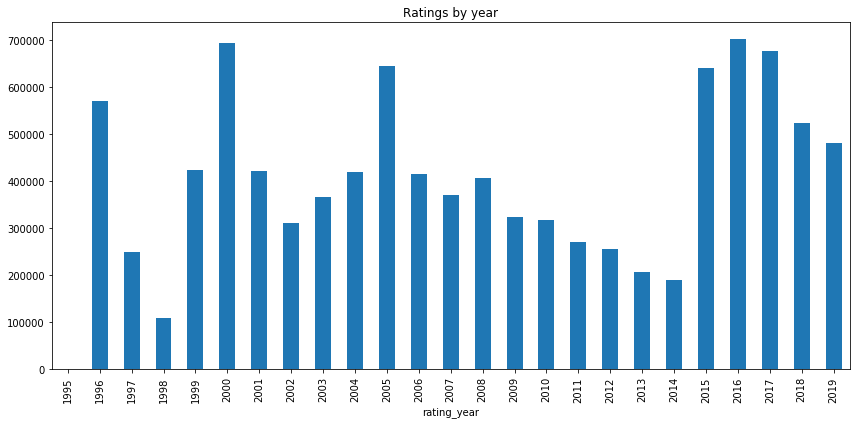

time: 716 ms


In [53]:
fig, ax = plt.subplots(1, 1, figsize = (12, 6))
ax1 = train.groupby('rating_year')['rating'].count().plot(kind='bar', title='Ratings by year')
fig.tight_layout()

The ratings for the movies span a period of 25 years, from 1995 all the way to 2019, with the last 5 years accumalatively having had the most ratings in comparison to any othe other 5 year interval. From 2006 to 2014 there is decline in user engagement when it comes to rating movies. Prior to 2006 there are 3 good years with ratings above 500000 ratings for the year, 3 more years at 400000 ratings and 3 below 300000 ratings for the year. it would be of interest to the spending behaviour of users for each of these years, as that would tell the complete story.

### Now for a look at the release year of each of the movies

In [39]:
# Creating the release year by extracting the release year from the movie title
train['release_year'] = train['title'].apply(get_release_dates)

time: 10.4 s


In [40]:
# Checking number of distinct years for movie releases, including the ealrliest and most recent year
train['release_year'].nunique(), train['release_year'].min(), train['release_year'].max()

(136, 6, 9999)

time: 170 ms


In [42]:
train[train['release_year'] != 6]['release_year'].min(), train[train['release_year'] != 9999]['release_year'].max()

(1874, 2019)

time: 2.28 s


The 9999 is returned by the <a>get_release_dates</a> function, for rows where the movie title does not specify the the release date. The 6 represents instances where the date was in all probability specified incorrectly as 6. The years from 1874 to 2019 represent a 145 year period, while there are 134 distinct years not including 6 and 9999 instances. As such it cannot be concluded that there are 11 years in which no movies were released in this 145 year period, given the above observations.

In [48]:
# Check for the number of movies released before 1995
train[train['release_year'] < 1995]['movieId'].nunique()

17937

time: 541 ms


In [44]:
# Check for the number of movies released between 1995 and 2019
train[(train['release_year'] >= 1995) & (train['release_year'] <= 2019)]['movieId'].nunique()

29906

time: 942 ms


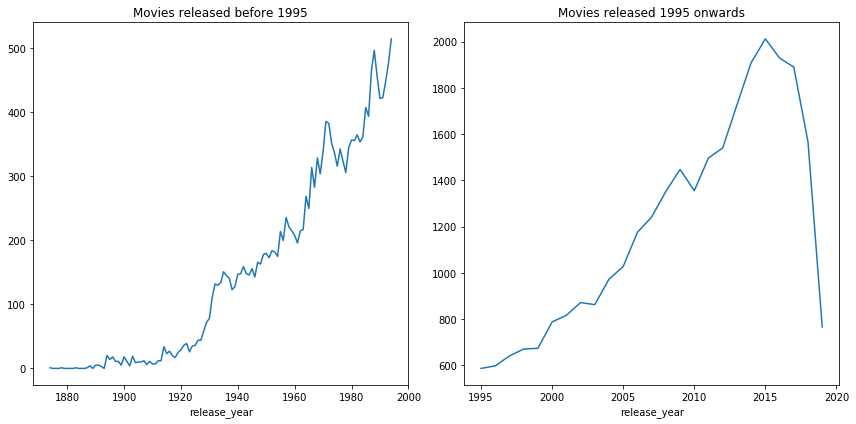

time: 4.49 s


In [47]:
pre_95_releases = pd.DataFrame({'release_year': list(range(1874, 1995)),
                                       'count': get_releases_by_year(train, range(1874, 1995))})
post_94_releases = pd.DataFrame({'release_year': list(range(1995, 2020)),
                                       'count': get_releases_by_year(train, range(1995, 2020))})

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = pre_95_releases.groupby('release_year')['count'].sum().plot(kind='line', ax=ax[0], title='Movies released before 1995')
ax2 = post_94_releases.groupby('release_year')['count'].sum().plot(kind='line', ax=ax[1], title='Movies released 1995 onwards')

fig.tight_layout()

29906 movies have been released in total since 1995 up to 2019, in comparison to the 17937 that have released up to 1994 going all the way back to 1874 (<b>this is not including movies that had no release date specified, which amount to 370 movies)</b>. The number of released movies per year is increases slowly at the beginning, then increasing faster leading up to 1995, where the is a substantial rise in the number of movies released. So much so that roughly on average a 153 movies have been released a year from 1874 to 1994, while that number increases substantially for the years between 1995 to 2019, averaging roughly 1246 movies per year. This has given users an overwheliming amount of options to choose from, with regards to the movies they can watch, catering to the needs of everyone, which makes the case for a recommendation system compelling.

### Distributins of  user ratings for movies in the past 25 years

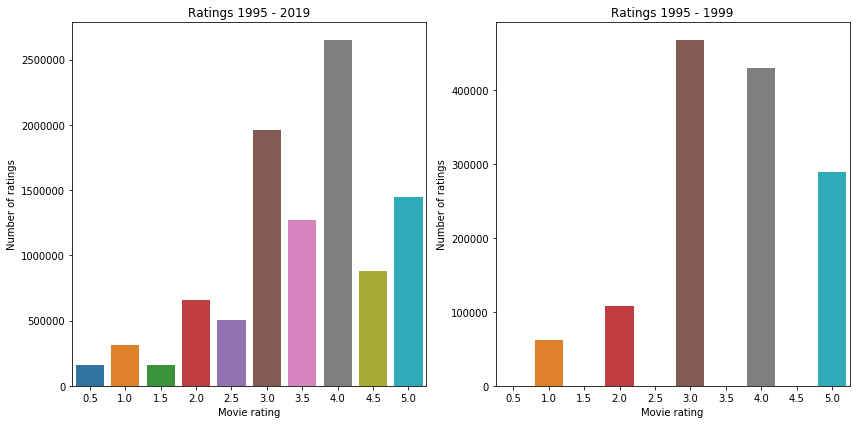

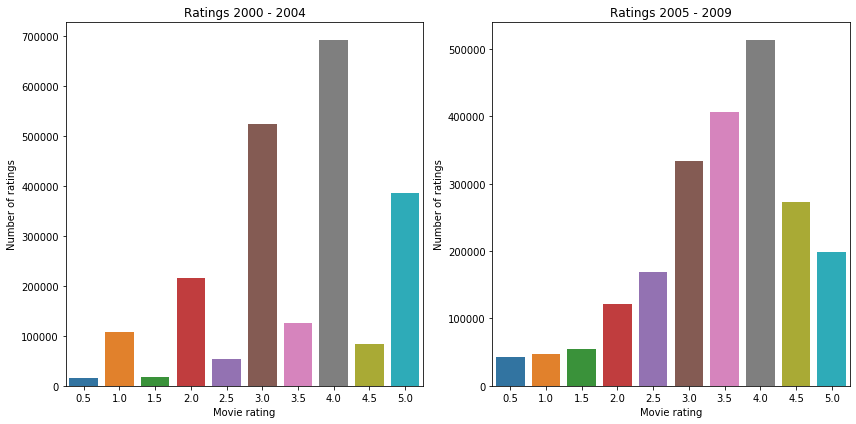

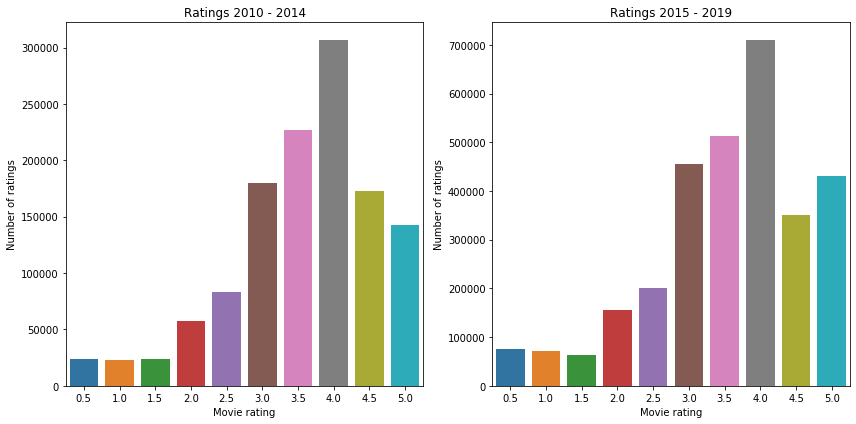

time: 9.79 s


In [60]:
keys = np.linspace(0.5, 5.0, 10)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = sns.barplot(keys, count_ratings_by_years(train, 1995, 2019), ax=ax[0])
ax1.set_title('Ratings 1995 - 2019')
ax1.set(xlabel='Movie rating', ylabel='Number of ratings')

ax2 = sns.barplot(keys, count_ratings_by_years(train, 1995, 1999), ax=ax[1])
ax2.set_title('Ratings 1995 - 1999')
ax2.set(xlabel='Movie rating', ylabel='Number of ratings')

fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax3 = sns.barplot(keys, count_ratings_by_years(train, 2000, 2004), ax=ax[0])
ax3.set_title('Ratings 2000 - 2004')
ax3.set(xlabel='Movie rating', ylabel='Number of ratings')

ax4 = sns.barplot(keys, count_ratings_by_years(train, 2005, 2009), ax=ax[1])
ax4.set_title('Ratings 2005 - 2009')
ax4.set(xlabel='Movie rating', ylabel='Number of ratings')

fig.tight_layout()

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax5 = sns.barplot(keys, count_ratings_by_years(train, 2010, 2014), ax=ax[0])
ax5.set_title('Ratings 2010 - 2014')
ax5.set(xlabel='Movie rating', ylabel='Number of ratings')

ax6 = sns.barplot(keys, count_ratings_by_years(train, 2015, 2019), ax=ax[1])
ax6.set_title('Ratings 2015 - 2019')
ax6.set(xlabel='Movie rating', ylabel='Number of ratings')

fig.tight_layout()

For the entire 25 year period, a rating of 4.0 is the most abundant rating given by users to movies, followed by a rating of 3.0. Ratings of 5.0, 3.5 and 4.5 are next most numerous ratings users give to movies. When the the 25 years are divided into 5, 5 year periods, the first 5 year period between 1995 and 1999, there is an anomaly in the ratings, quite different from th other periods, but still with ratings of 4.0 and 3.0 being the most abundant, followed by a 5.0 rating. The last 3 intervals there is a contant pattern that has emerged with the distributions of the ratings.

### Ratings distributions across movie genres

In [62]:
# Creating a genre count column, for the number of genres a movie belongs to
train['genre_count'] = train['genres'].apply(lambda genres: len(genres.split('|')))

time: 10.2 s


In [63]:
# Creating a list of all the genres 
movie_genres = []
train['genres'].apply(lambda genres: movie_genres.extend(genres.split('|')))
movie_genres = sorted(set(movie_genres))

time: 2min 10s


In [65]:
# Getting minimum and maximum number of genres for movies
train['genre_count'].min(), train['genre_count'].max()

(1, 10)

time: 692 ms


Movies have at a minimum 1 genre and a maximum of 10 genres associated with them. Next let's look at how the ratings are distributed across movies based on the numnber of genres associated with the movies, and what the average rating is.

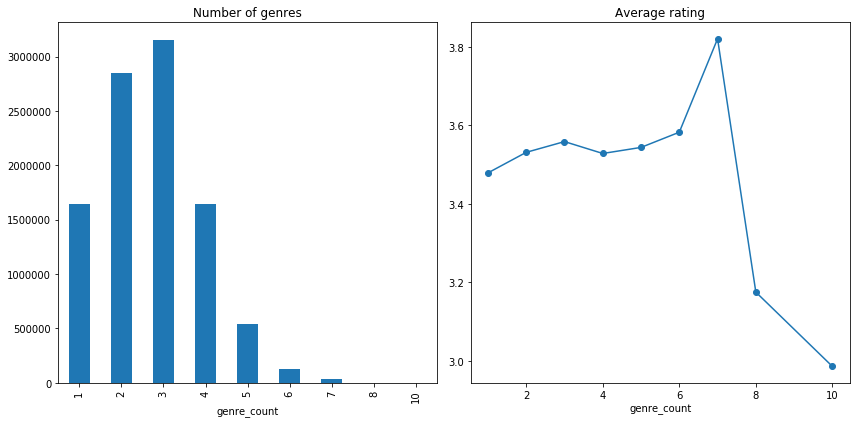

time: 24.6 s


In [67]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = train.groupby('genre_count')['rating'].count().plot(kind='bar', title='Number of genres', ax=ax[0])
ax2 = train.groupby('genre_count')['rating'].mean().plot(kind='line', marker='o', title='Average rating', ax=ax[1])

fig.tight_layout()

Movies with between 1 to 4 genres have the most number of ratings for the 25 years, with an average rating for these of roughly bewteen 3.5 to 3.6. Movies with 2 and 3 genres movies get the lions share of the ratings. 

When delving a little deeper, with movies with between 1 to 4 genres, to see which genres get the most ratings this is what we find.

<BarContainer object of 20 artists>

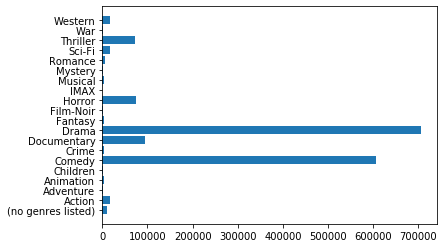

time: 6.09 s


In [73]:
plt.barh(movie_genres, get_genre_count(1, movie_genres, train))

<BarContainer object of 20 artists>

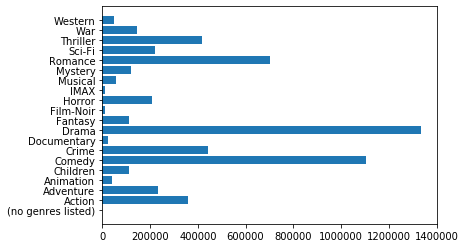

time: 7.97 s


In [74]:
plt.barh(movie_genres, get_genre_count(2, movie_genres, train))

<BarContainer object of 20 artists>

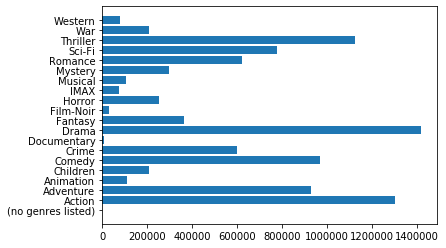

time: 11.1 s


In [75]:
plt.barh(movie_genres, get_genre_count(3, movie_genres, train))

<BarContainer object of 20 artists>

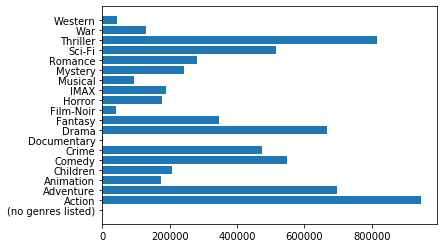

time: 7.13 s


In [76]:
plt.barh(movie_genres, get_genre_count(4, movie_genres, train))

Surprisingly for 1 genre movies, Drama and Comedy dominate the ratings almost completely. With the 2, 3 and 4 genre movies we the expected result emerge, with genres such Action, Adventure, Animation, Crime, Romance, Thriller, Mystery, Sci-Fi and Horror making a strong show as well. However each movie now contributes to 2, 3 and 4 movies respectively. Movies with 2, 3 and 4 genres have a broad appeal among users as they have a little something for everyone. Might be something to consider when movies are added to the movie catalogue in the future.

### Decade movies were released

Here we consider what effect the decade a movie was released has on the ratings users give the movie

In [77]:
# count:  number of movies released in each decade
# average: average rating for the movies in each decade
count, average = movie_rating_decade_released(1995, 2019, decades, train)
decades_df = pd.DataFrame(list(zip(decade_categories, count, average)), columns=['decade', 'ratings_count', 'ratings_average']).fillna(0)
decades_df

,decade,ratings_count,ratings_average
0,1870s,8,2.69
1,1880s,32,2.50
2,1890s,0,0.00
3,1900s,1143,3.22
4,1910s,15258,3.80
5,1920s,77681,3.80
6,1930s,121646,3.87
7,1940,198803,3.85
8,1950s,293647,3.80
9,1960s,507445,3.77


time: 10 s


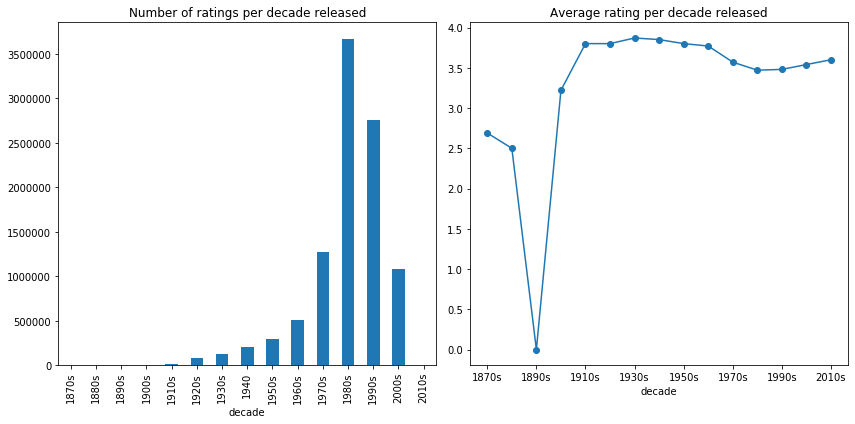

time: 1.41 s


In [79]:
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = decades_df.groupby('decade')['ratings_count'].sum().plot(kind='bar', title='Number of ratings per decade released', ax=ax[0])
ax2 = decades_df.groupby('decade')['ratings_average'].sum().plot(kind='line', marker='o', title='Average rating per decade released', ax=ax[1])

fig.tight_layout()

This is an interesting insight in the data with potentially huge implications, that will be eloborated upon later, in the conclusion when recommendations are put forward. For now however what emerges is the following; movies from before the 1970s have little to no ratings associated with them. Movies released from 1980s have the most ratings. The average rating for movies released for each decade from 1910 onwards is between 3.5 and 4.0., with that average for movies released in later decades carries more weight, since they have more ratings. With movies released in earlier decades having a lower average, perhaps to do with the quality of the movies.

However, if the 25 year ratings period is divided into 5, 5 year intervals, does this pattern hold, lets find out.

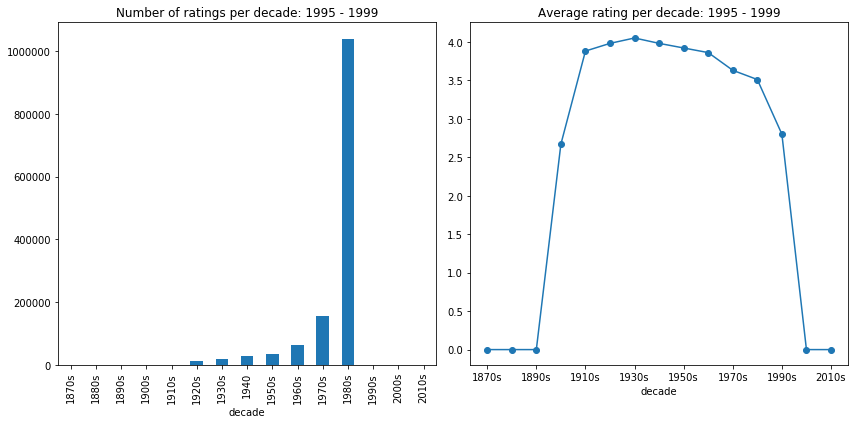

time: 4.04 s


In [82]:
count, average = movie_rating_decade_released(1995, 1999, decades, train)
decades_df = pd.DataFrame(list(zip(decade_categories, count, average)), columns=['decade', 'ratings_count', 'ratings_average']).fillna(0)

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = decades_df.groupby('decade')['ratings_count'].sum().plot(kind='bar', title='Number of ratings per decade: 1995 - 1999', ax=ax[0])
ax2 = decades_df.groupby('decade')['ratings_average'].sum().plot(kind='line', marker='o', title='Average rating per decade: 1995 - 1999', ax=ax[1])

fig.tight_layout()

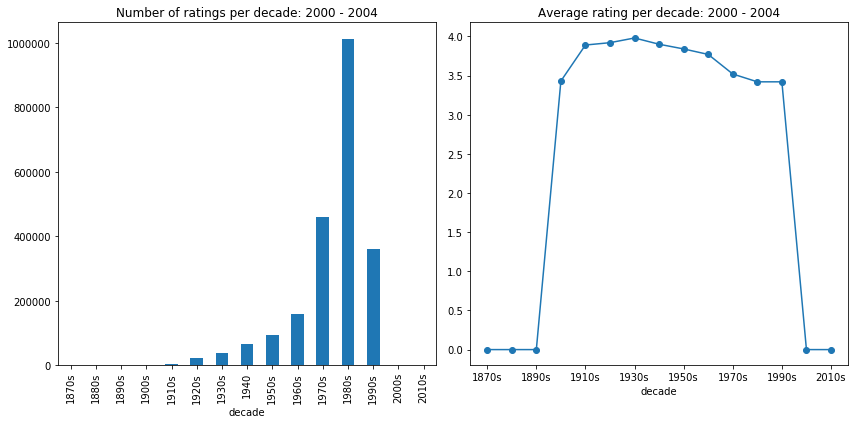

time: 4 s


In [83]:
count, average = movie_rating_decade_released(2000, 2004, decades, train)
decades_df = pd.DataFrame(list(zip(decade_categories, count, average)), columns=['decade', 'ratings_count', 'ratings_average']).fillna(0)

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = decades_df.groupby('decade')['ratings_count'].sum().plot(kind='bar', title='Number of ratings per decade: 2000 - 2004', ax=ax[0])
ax2 = decades_df.groupby('decade')['ratings_average'].sum().plot(kind='line', marker='o', title='Average rating per decade: 2000 - 2004', ax=ax[1])

fig.tight_layout()

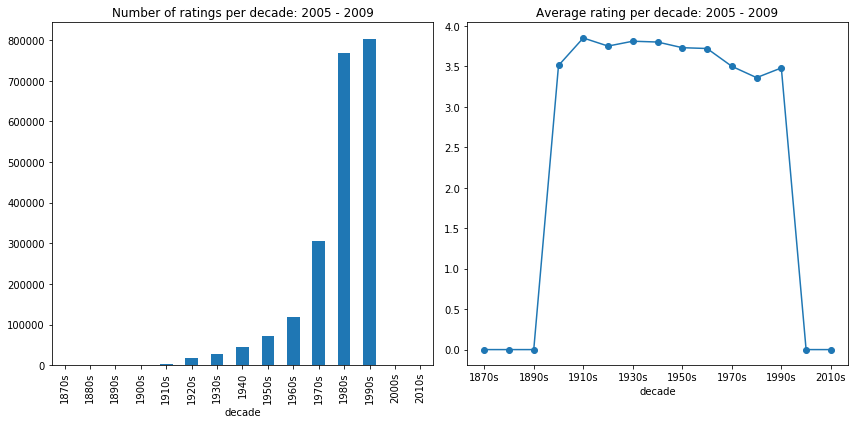

time: 3.31 s


In [84]:
count, average = movie_rating_decade_released(2005, 2009, decades, train)
decades_df = pd.DataFrame(list(zip(decade_categories, count, average)), columns=['decade', 'ratings_count', 'ratings_average']).fillna(0)

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = decades_df.groupby('decade')['ratings_count'].sum().plot(kind='bar', title='Number of ratings per decade: 2005 - 2009', ax=ax[0])
ax2 = decades_df.groupby('decade')['ratings_average'].sum().plot(kind='line', marker='o', title='Average rating per decade: 2005 - 2009', ax=ax[1])

fig.tight_layout()

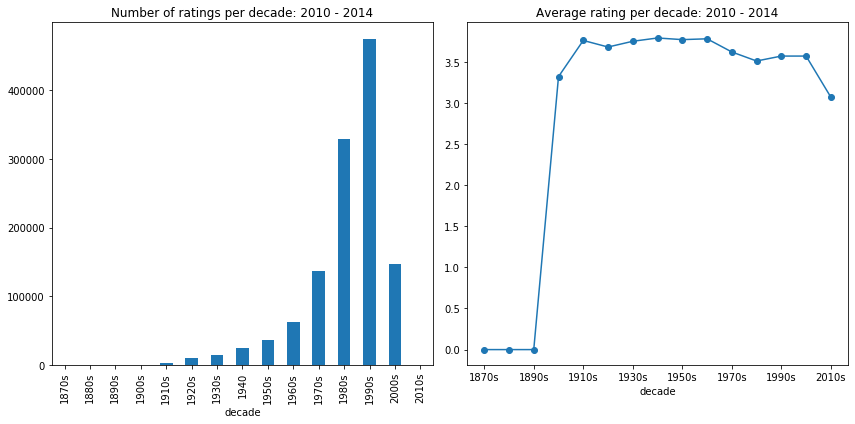

time: 3.1 s


In [85]:
count, average = movie_rating_decade_released(2010, 2014, decades, train)
decades_df = pd.DataFrame(list(zip(decade_categories, count, average)), columns=['decade', 'ratings_count', 'ratings_average']).fillna(0)

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = decades_df.groupby('decade')['ratings_count'].sum().plot(kind='bar', title='Number of ratings per decade: 2010 - 2014', ax=ax[0])
ax2 = decades_df.groupby('decade')['ratings_average'].sum().plot(kind='line', marker='o', title='Average rating per decade: 2010 - 2014', ax=ax[1])

fig.tight_layout()

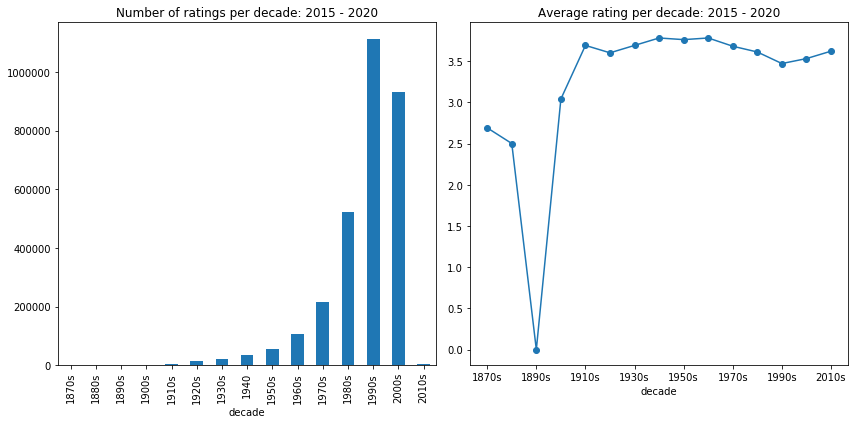

time: 3.67 s


In [86]:
count, average = movie_rating_decade_released(2015, 2020, decades, train)
decades_df = pd.DataFrame(list(zip(decade_categories, count, average)), columns=['decade', 'ratings_count', 'ratings_average']).fillna(0)

fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = decades_df.groupby('decade')['ratings_count'].sum().plot(kind='bar', title='Number of ratings per decade: 2015 - 2020', ax=ax[0])
ax2 = decades_df.groupby('decade')['ratings_average'].sum().plot(kind='line', marker='o', title='Average rating per decade: 2015 - 2020', ax=ax[1])

fig.tight_layout()

In [87]:
train[train['release_year'] <= 1969]['movieId'].nunique(), train[train['release_year'] <= 1979]['movieId'].nunique(),

(8206, 11637)

time: 8.53 s


In [88]:
train[train['release_year'] <= 1969]['rating'].count(), train[train['release_year'] <= 1979]['rating'].count(), train[train['release_year'] > 1979]['rating'].count()

(709179, 1216624, 8783414)

time: 37.3 s


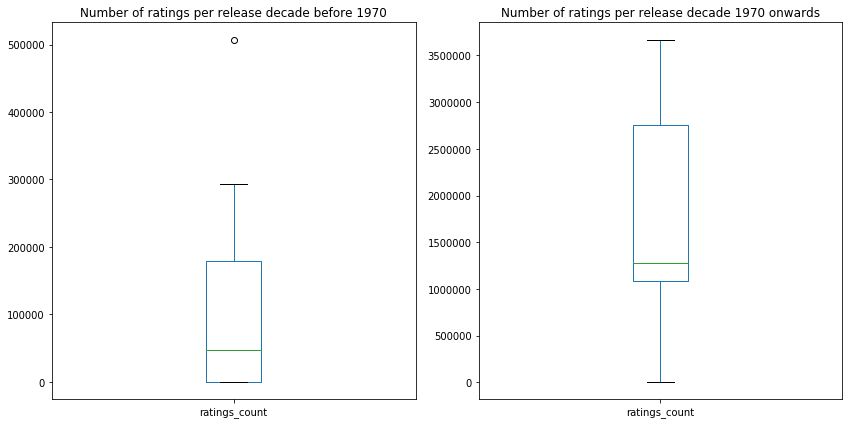

time: 17 s


In [89]:
# count:  number of movies released in each decade
# average: average rating for the movies in each decade
count, average = movie_rating_decade_released(1995, 2019, decades, train)
decades_df = pd.DataFrame(list(zip(decade_categories, count, average)), columns=['decade', 'ratings_count', 'ratings_average']).fillna(0)
fig, ax = plt.subplots(1, 2, figsize = (12, 6))

ax1 = decades_df[decades_df['decade'] < '1970s']['ratings_count'].plot(kind='box', title='Number of ratings per release decade before 1970', ax=ax[0])
ax2 = decades_df[decades_df['decade'] >= '1970s']['ratings_count'].plot(kind='box', title='Number of ratings per release decade 1970 onwards', ax=ax[1])

fig.tight_layout()

Analysis will centre around revenue cost for having movies on catalogue, showing users movies they don't want see - brand affinity, computational resources and the expense thereof.

In [91]:
grouped_df = train.groupby('userId').count()

time: 4.1 s


In [92]:
grouped_df.head()

,movieId,rating,title,genres,rating_year,release_year,genre_count
userId,,,,,,,
1,28,28,28,28,28,28,28
2,72,72,72,72,72,72,72
3,251,251,251,251,251,251,251
4,89,89,89,89,89,89,89
5,35,35,35,35,35,35,35


time: 1.17 s


In [93]:
users_2000 = get_user_ids(2000, set(train[train['rating_year'] <= 2000]['userId']), train)

time: 21min 59s


In [96]:
len(set(users_2000))

48706

time: 40.9 ms


There are 48706 users that have not rated a movie since the year 2000, it would be of interest to compare this finding with actual spending behaviour of these users to see if they have have watched any movies of the the movie streaming service. If the answer is no, this to will potentially have huge implications, which will be eloborated upon later in the recommendations put forward.

# 7. Modelling <a name="modelling"></a>
[Return to top](#top) <br><br>

# 8. Model evaluation <a name="evaluation"></a>
[Return to top](#top) <br><br>

# 9. Conclusion <a name="conclusion"></a>
[Return to top](#top) <br><br>


### Production plan

It is the recommendation of us the SY_1 team that taking the recommendation engine to production and integratingit with the movie streaming service should and must be an experimental phased out approach.

The reason for this is simple, for all of the metrics that are used to evaluate the performance of an recommendation engine, in our case RMSE, the true test is how users engage with the recommendation the engine makes.

As a glaring example of how things can go wrong, back in 2006, Walmart.com issued a public apology and took down its entire cross-selling recommendation system when customers who looked at a boxed set of movies that included "Martin Luther King: I Have a Dream" and "Unforgivable Blackness: The Rise and Fall of Jack Johnson" were told they might also appreciate a "Planet of the Apes" DVD collection. this did not go down well with users.

#### A|B Testing

We select a representative sample of users, large enough for the results to be statistically significant. The recommendation engine is introduced to this sample of users first to gauge the success of the recommendation the engine provides to users.

#### Analytics

In addition an analytics package can be used to track user engagement with recommedations. The analytics package is limited to only interactions with paying users, so as to avert any malicious attemts to try and game the system, as it would be prohibitively expensive for a paying user to game the system, ensuring results are reliable.

#### Stoplists

Stoplists ensure that potentially offensive titles remain unknown to the system, and will not be recommended to users, users who wish to watch such movies can search for them themselves.

#### Users and Movies

The 2 most interesting insights gained from our analysis were the following:
- 1 There were 48706 users who last made a rating in the year 2000, 19 years ago.
- 2 Movies from before the 1970s received little to almost no ratings in the 25 years users have been rating movies, amounting to 8206 movies.

There are implications for the above insights, both from a <b>revenue</b> and <b>brand affinity among users</b> stand point. Considering that an increase in both revenue and brand affinity among users are the twin objectives that have motivated the project to begin with, they deserve some consideration. 

If fininacial data pertaining to the above mentioned users and movies supports what the rating data is telling us, then serious consideration needs to be taken about whether having these using on the systems is justified. Is it possible that these users are still spending money to watch movies and whether the movies are still profitable for the company, intution tells not likely, but again itsb the data that will have the final say in this matter.

From a cost perspective to issues arise:
- 1 Storage space to store the detail of these users and movies
- 2 Computational resources to train the engine with these users and movies

Both of these costs undercut the revuenue base of the company, as your bill with your cloud service provider will higher, for storage space and computational resources consumed as models need to retrained periodically to account for new users and movies added to the system.

From a brand affinity among users this following issue arises:
- 1 What influence do the above mentioned users and movies have on the quality of the recommendations made to the current user base.

Again we would advocate an experimental approach to gauge the potential consequences of removing these users and movies from the system, if the data supports such a move.

Overall there are 2 approaches to rolling out the recommendation engine, we do so with the entire user base or we do so in stages, first with a representative sample of users, gauge the success of the engine, then roll it out to the entire user base.

Both approaches have consequences, the former: if things go wrong, the entire user base was exposed, and this will result in in a decrease in both revenues and brand affinity among users. The latter: happening in stages will incur more cost up front, costs which will have to weighed against potential future gains.

At this point in the phase of the project, our job as team SY_1 is done, it is now up to management to consider the recommendations we have made, and chart the course for the next phase of taking the project to production.